Ce jeu de données contient 41 entrées, qui décrivent chacune les performances d'un athlète à une compétition de décathlon.

Nous allons faire une ACP des dix variables décrivant les performances à chacune des épreuves du décathlon
(100 mètres, saut en longueur, lancer de poids, saut en hauteur, 400 mètres, 110 mètres haies, lancer de disque, saut à la perche, javelot et 1 500 mètres).

In [16]:
import pandas as pd
import numpy as np
# charger les données
data = pd.read_csv('http://factominer.free.fr/factomethods/datasets/decathlon.txt', sep="\t")

# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# transformer les données en array numpy
X = my_data.values

Rappel : nous avons fait l'hypothèse que les données étaient centrées. Nous allons donc commencer par les standardiser.

In [17]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

**Calculons maintenant les deux premières composantes principales :**

In [18]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

**Pourcentage de variance expliquée**

*pca.explained_variance_ratio_* nous donne le pourcentage de variance expliquée par chacune des composantes.

In [19]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.32719055 0.1737131 ]
0.5009036561090069


La première composante explique environ un tiers de la variance observée dans les données, et la deuxième 17,3 %.

Au total, ces deux composantes expliquent 50 % de la variance totale, en utilisant seulement un cinquième des dimensions initiales.

**Nous pouvons représenter chaque athlète/compétition selon ces deux dimensions uniquement, et colorer chacun des points correspondants en fonction du classement de l'athlète lors de cette compétition.**

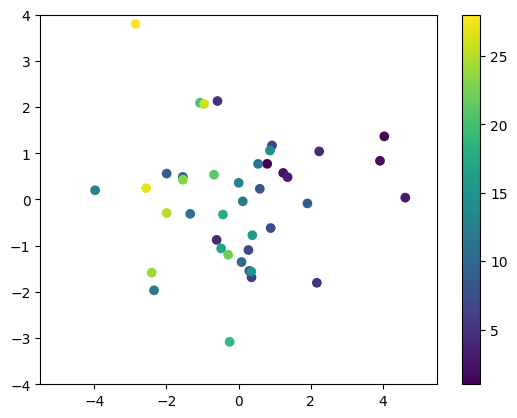

In [20]:
import matplotlib.pyplot as plt


# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.Rank)

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

Les bonnes performances (points bleu foncé) sont plutôt situées dans la partie droite du graphe (PC1 > 0)
Et les moins bonnes (points jaunes) plutôt dans la partie gauche (PC1 < 0).

**Contribution de chaque variable aux composantes principales**

Pour mieux comprendre ce que capturent ces composantes principales, nous pouvons utiliser pca.components_  , qui nous donne les coordonnées des composantes principales dans l'espace initial (celui à 10 variables).

Nous allons afficher, pour chacune des 10 performances, un point dont l'abscisse sera sa contribution à la première PC, et l'ordonnée sa contribution à la deuxième PC.

(-0.7, 0.7)

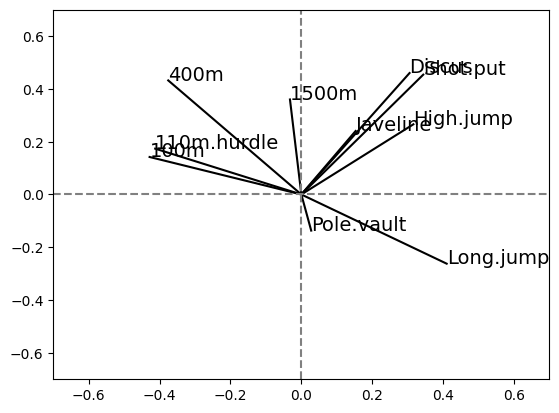

In [21]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

- Les variables qui ont une contribution négative à la première composante principale correspondent aux disciplines pour lesquelles une bonne performance est représentée par un petit nombre (temps de course), et inversement pour les variables ayant une contribution positive.

Cette composante permet de séparer les athlètes qui ont de très bonnes performances de ceux qui sont (relativement !) plus mauvais dans toutes les disciplines, comme nous l'avions remarqué.

- La deuxième composante principale permet de séparer les athlètes plus forts (bonnes performances aux lancers) et moins endurants (basses performances aux 400 m et 1 500 m) des autres.

- Ce graphique nous permet aussi d'observer que certaines variables sont très corrélées, comme Discus (performance au lancer de disque) et Shot put (performance au lancer de poids).

En résumé, l'ACP (ou PCA), nous a permis de :

-représenter les données en deux dimensions

-établir des profils des athlètes

-mettre au jour des corrélations entre des variables.